In [3]:
import lib.World as W
import numpy as np
from stl import mesh

from time import process_time

FARAWAY = 1.0e+39

source = np.array((0, 0, -5))

w, h = (320, 240)
r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1, 1 / r + .25, 1, -1 / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

In [4]:
coords = np.stack((x, y, np.zeros(x.shape[0])), axis=0)
dirs = coords - source[:, np.newaxis]

m = mesh.Mesh.from_file('models/sphereCentered.stl')
direction = dirs

frame = W.Frame((0, 0, 0))
obj = W.MeshObject([0, 0, 0], frame, m, (0,))

t1s = process_time()
#arr1, n1 = obj.chas_intersect(np.repeat(source[:, np.newaxis], direction.shape[1], axis=1), direction)
t1e = process_time()

t2s = process_time()
arr2, n2 = obj.intersect(np.repeat(source[:, np.newaxis], direction.shape[1], axis=1), direction)
t2e = process_time()

#print((arr2 == arr1).all())
print("time1: " + str(t1e-t1s))
print("time2: " + str(t2e-t2s))

#np.max(np.abs(arr1-arr2))

time1: 0.0
time2: 5.28125


In [5]:
from PIL import Image

0.9496698843416805 0.8000791265663522
0.157518691749424 0.0


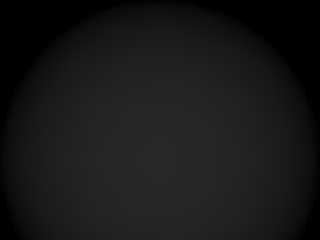

In [6]:
cleaned = np.where(arr2 < 200, arr2, 0)
m = np.max(cleaned)
cleaned = np.where(arr2 < 200, arr2, m)
cleaned = np.where(cleaned < 0, 0, cleaned)

print(np.max(cleaned), np.min(cleaned))
arr_bw = 1-cleaned/m
print(np.max(arr_bw), np.min(arr_bw))
bw_image = Image.fromarray(np.rint(255 * arr_bw.reshape((240, 320))).astype(np.uint8), mode='L')
display(bw_image)

In [ ]:
cleaned = np.where(arr1 < 200, arr2, 0)
m = np.max(cleaned)
cleaned = np.where(arr1 < 200, arr2, m)
cleaned = np.where(cleaned < 0, 0, cleaned)

print(np.max(cleaned), np.min(cleaned))
arr_bw = 1-cleaned/m
print(np.max(arr_bw), np.min(arr_bw))
bw_image = Image.fromarray(np.rint(255 * arr_bw.reshape((240, 320))).astype(np.uint8), mode='L')
display(bw_image)

In [ ]:
np.max(np.extract(arr1 < 1000, arr1))